<a href="https://colab.research.google.com/github/SajjitMalla01/worksheet/blob/main/2408645_SajjitMalla_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2408645
SajjitMalla

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/datasets_assesment/Quality_of_Life.csv')

In [5]:
df

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Venezuela,15.11,'Very Low',19.26,'Very Low',38.69,'Low',0.00,NaN,35.85,'Very Low',17.49,'Very High',32.80,'Low',75.30,'High',0.0,NaN
203,Vietnam,44.49,'Low',59.00,'Moderate',61.32,'High',71.24,'High',26.85,'Very Low',24.77,'Very High',29.62,'Low',84.19,'Very High',': 97.18','Very Low'
204,Yemen,20.74,'Very Low',34.07,'Low',25.31,'Low',0.00,NaN,48.66,'Low',15.98,'High',15.00,'Very Low',83.17,'Very High',0.0,NaN
205,Zambia,22.32,'Very Low',54.39,'Moderate',54.44,'Moderate',0.00,NaN,36.74,'Very Low',72.42,'Very High',38.86,'Moderate',80.90,'Very High',0.0,NaN


In [6]:
#display the first 10 rows.
df.head(10)



,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'
5,Andorra,121.14,'Very High',84.71,'Very High',75.56,'High',0.00,NaN,48.09,'Low',9.03,'Moderate',13.33,'Very Low',22.98,'Low',0.0,NaN
6,Anguilla,0.00,NaN,75.44,'High',77.08,'High',0.00,NaN,0.00,NaN,1.8399999999999999,'Very Low',0.00,NaN,0.00,NaN,0.0,NaN
7,Antigua And Barbuda,0.00,NaN,42.86,'Moderate',30.56,'Low',0.00,NaN,0.00,NaN,0.0,NaN,35.00,'Moderate',43.10,'Moderate',0.0,NaN
8,Argentina,40.36,'Low',36.36,'Low',68.00,'High',98.28,'Very High',32.65,'Very Low',20.05,'Very High',44.07,'High',50.81,'Moderate',': 115.06','Low'
9,Armenia,36.91,'Very Low',77.81,'High',58.07,'Moderate',63.42,'High',41.84,'Low',20.95,'Very High',29.31,'Low',62.55,'High',': 116.56','Low'


In [7]:
#Identify the number of rows and columns in the dataset.
row=len(df.index)
print(f"no of row = {row}.")
columns=len(df.columns)
print(f"no of columns = {columns}.")


no of row = 207.
no of columns = 19.


In [8]:
#List all the columns and their data types.
print("All the columns and their data types :- ")
print(df.dtypes)

All the columns and their data types :- 
country                               object
Purchasing Power Value               float64
Purchasing Power Category             object
Safety Value                         float64
Safety Category                       object
Health Care Value                    float64
Health Care Category                  object
Climate Value                        float64
Climate Category                      object
Cost of Living Value                 float64
Cost of Living Category               object
Property Price to Income Value        object
Property Price to Income Category     object
Traffic Commute Time Value           float64
Traffic Commute Time Category         object
Pollution Value                      float64
Pollution Category                    object
Quality of Life Value                 object
Quality of Life Category              object
dtype: object


In [9]:
 df.describe()

,Purchasing Power Value,Safety Value,Health Care Value,Climate Value,Cost of Living Value,Traffic Commute Time Value,Pollution Value
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,53.559662,55.171159,58.779420,42.083623,36.399758,29.171932,55.627053
std,44.051644,15.665138,15.165557,40.988151,20.989605,15.178068,23.663186
min,0.000000,15.890000,18.520000,-3.540000,0.000000,0.000000,0.000000
25%,19.970000,44.235000,48.550000,0.000000,25.310000,20.170000,37.925000
50%,44.490000,54.390000,58.200000,55.410000,36.740000,30.000000,60.000000
75%,83.880000,67.770000,68.525000,82.995000,49.870000,38.880000,73.275000
max,184.270000,92.650000,100.000000,99.890000,83.090000,65.310000,106.670000


In [10]:
#checking missing file
missing_values = df.isnull().sum()
print(missing_values)

country                               0
Purchasing Power Value                0
Purchasing Power Category            33
Safety Value                          0
Safety Category                       0
Health Care Value                     0
Health Care Category                  0
Climate Value                         0
Climate Category                     95
Cost of Living Value                  0
Cost of Living Category              32
Property Price to Income Value        0
Property Price to Income Category    10
Traffic Commute Time Value            0
Traffic Commute Time Category        17
Pollution Value                       0
Pollution Category                    5
Quality of Life Value                 0
Quality of Life Category             95
dtype: int64


In [11]:
#check duplicate data
df.duplicated().sum()


0

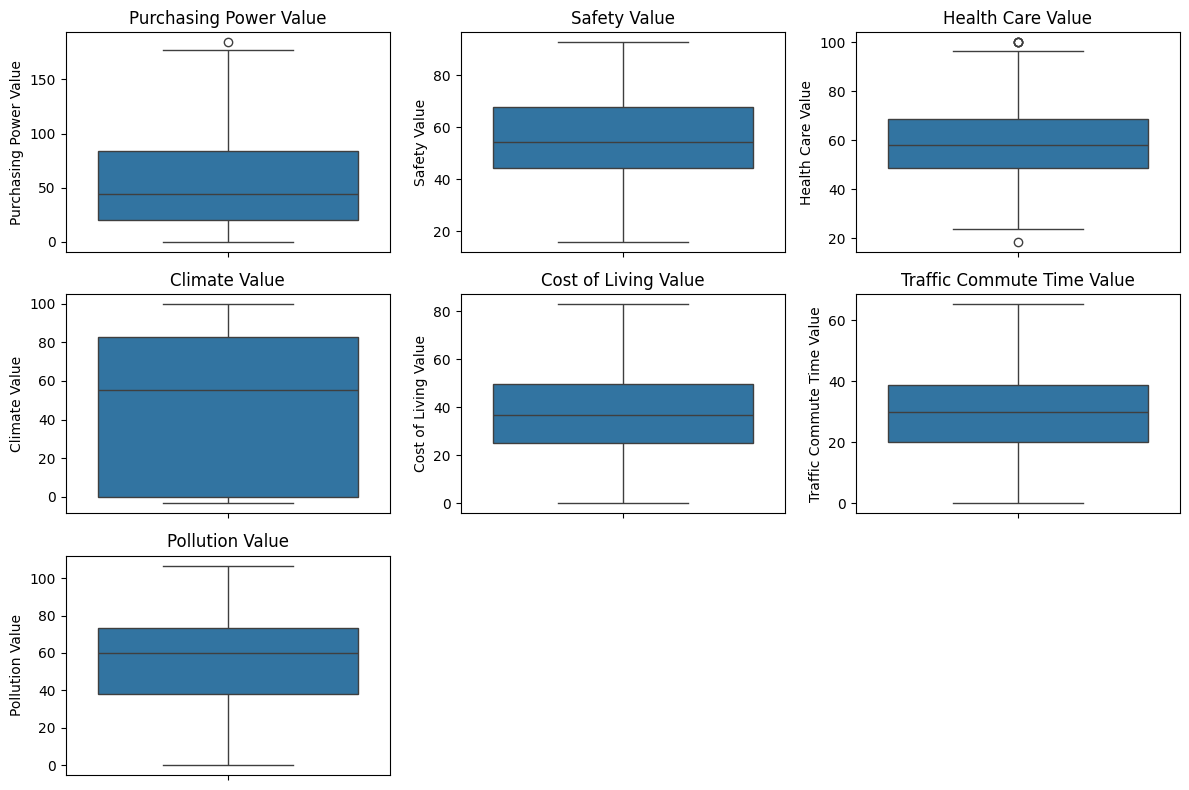

In [12]:
#box plot
num_features =  df[['Purchasing Power Value', 'Safety Value', 'Health Care Value',
                   'Climate Value', 'Cost of Living Value', 'Traffic Commute Time Value',
                   'Pollution Value']]

# Creating boxplots for each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features.columns, 1):  # Use num_features.columns
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

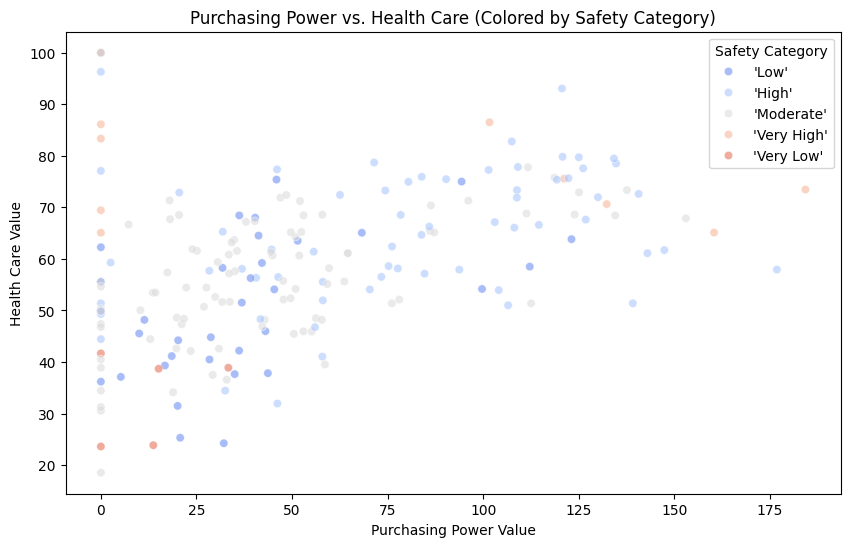

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/datasets_assesment/Quality_of_Life.csv')

# Scatter plot with relevant columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Purchasing Power Value"], y=df["Health Care Value"],
                hue=df["Safety Category"], palette="coolwarm", alpha=0.6)

plt.xlabel("Purchasing Power Value")
plt.ylabel("Health Care Value")
plt.title("Purchasing Power vs. Health Care (Colored by Safety Category)")
plt.legend(title="Safety Category")
plt.show()



In [14]:
c = df.select_dtypes(include=["number"]).corr()
c

,Purchasing Power Value,Safety Value,Health Care Value,Climate Value,Cost of Living Value,Traffic Commute Time Value,Pollution Value
Purchasing Power Value,1.000000,0.410738,0.402342,0.360924,0.682189,0.069977,-0.304724
Safety Value,0.410738,1.000000,0.538248,0.118363,0.160752,-0.229761,-0.434899
Health Care Value,0.402342,0.538248,1.000000,0.252894,0.166443,-0.058142,-0.390020
Climate Value,0.360924,0.118363,0.252894,1.000000,0.216708,0.442793,0.033590
Cost of Living Value,0.682189,0.160752,0.166443,0.216708,1.000000,0.161562,-0.144459
Traffic Commute Time Value,0.069977,-0.229761,-0.058142,0.442793,0.161562,1.000000,0.292847
Pollution Value,-0.304724,-0.434899,-0.390020,0.033590,-0.144459,0.292847,1.000000


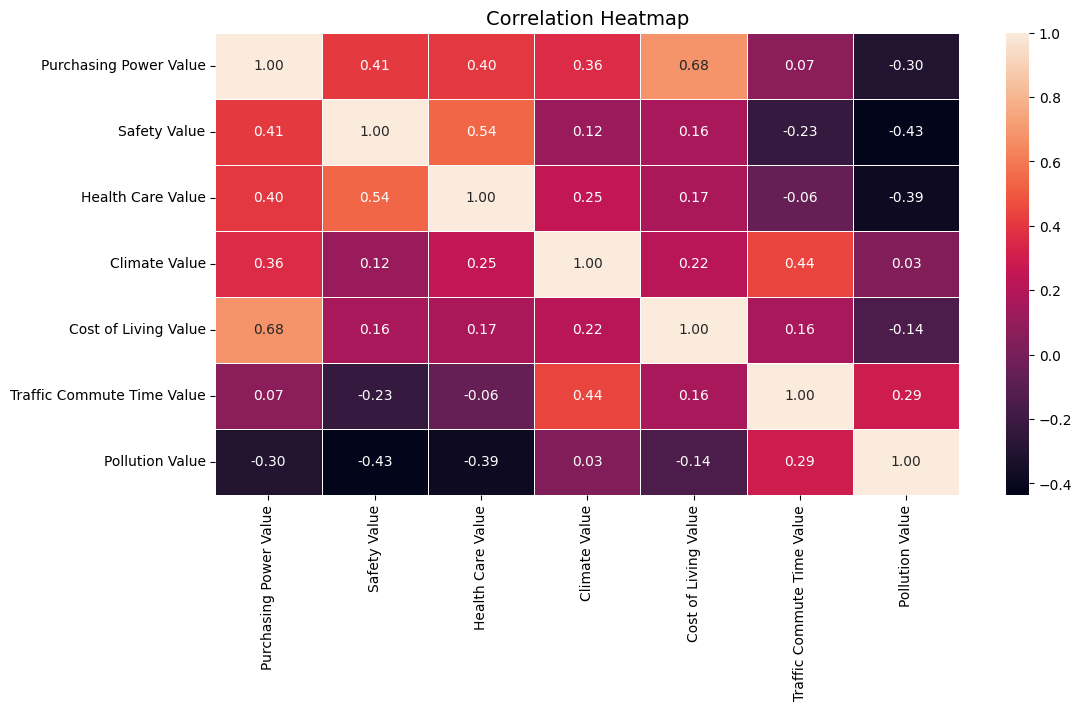

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(c, annot=True, cmap="rocket", fmt=".2f", linewidths=0.5)  # Fix colormap
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [16]:
#saving clean dataset in drive
df.to_csv("/content/drive/MyDrive/datasets_assesment/Quality_of_Life.csv", index=False)


In [17]:
#opening the clean data set
df = pd.read_csv("/content/drive/MyDrive/datasets_assesment/Quality_of_Life.csv")

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Clean the columns to remove non-numeric characters and convert to numeric types
def clean_and_convert_to_numeric(df):
    # Convert all columns to string type and remove unwanted characters
    df = df.replace({r"[^0-9.]+": ""}, regex=True)
    df = df.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, set invalid parsing to NaN
    return df

# Clean the relevant columns in X and y
X = df[['Purchasing Power Value', 'Safety Value', 'Climate Value',
        'Cost of Living Value', 'Traffic Commute Time Value',
        'Pollution Value', 'Quality of Life Value']]

y = df['Health Care Value']

# Clean and convert the values in both X and y
X = clean_and_convert_to_numeric(X)
y = clean_and_convert_to_numeric(y)

# Handle missing values by replacing them with the median of each column
X = X.fillna(X.median())  # Replace missing values in features with median
y = y.fillna(y.median())  # Replace missing values in target with median

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now the data is ready to be used for machine learning


2. Build a Model from Scratch

In [19]:
#scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Initialize weights and bias
weights = np.zeros(X_train_scaled.shape[1])
bias = 0

# Cost function and gradient computation
def compute_cost_and_gradient(X, y, weights, bias):
    m = X.shape[0]
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)

    # Cost: Binary cross-entropy
    cost = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    # Gradients
    dw = np.dot(X.T, (predictions - y)) / m
    db = np.mean(predictions - y)

    return cost, dw, db

# Gradient descent optimization
def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
    for i in range(num_iterations):
        cost, dw, db = compute_cost_and_gradient(X, y, weights, bias)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Print cost every 100 iterations for debugging
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, bias

# Training the model
learning_rate = 0.01
num_iterations = 1000
weights, bias = gradient_descent(X_train_scaled, y_train, weights, bias, learning_rate, num_iterations)

Iteration 0: Cost 0.6931471805599456
Iteration 100: Cost -inf
Iteration 200: Cost -inf
Iteration 300: Cost -inf
Iteration 400: Cost -inf


<ipython-input-19-2143d23b04b4>:15: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Iteration 500: Cost -inf
Iteration 600: Cost -inf
Iteration 700: Cost -inf
Iteration 800: Cost -inf
Iteration 900: Cost -inf


In [20]:
# Ensure y_train and y_test are binary (0 or 1) before training
threshold = 0.5  # Adjust based on your data distribution

# If your y values are continuous, convert them into binary labels
y_train = (y_train >= threshold).astype(int)
y_test = (y_test >= threshold).astype(int)

# Predict labels using the trained model
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    return (probabilities >= 0.5).astype(int)  # Threshold at 0.5

# Predict on training and test sets
y_train_pred = predict(X_train_scaled, weights, bias)
y_test_pred = predict(X_test_scaled, weights, bias)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

# Evaluate the scratch Logistic Regression model
print("Logistic Regression from Scratch:")
evaluate_model(y_train, y_train_pred, "Train Set")
evaluate_model(y_test, y_test_pred, "Test Set")


Logistic Regression from Scratch:

Train Set Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Test Set Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00



3.Build a Primary Model

In [36]:
# Model 1 LogisticRegression
# Model 1 LogisticRegression
# Assuming 'Health Care Value' is your target variable
y = (df['Health Care Value'] > df['Health Care Value'].median()).astype(int)  # Create binary target

# Split into training and testing sets without stratification if classes are imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (rest of the code) ...
log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train_scaled, y_train)

y_pred_sklearn = log_reg_sklearn.predict(X_test_scaled)

accuracy_log = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-Learn Logistic Regression Accuracy: {accuracy_log:.4f}")
print(classification_report(y_test, y_pred_sklearn))



Scikit-Learn Logistic Regression Accuracy: 0.6190
              precision    recall  f1-score   support

           0       0.57      0.68      0.62        19
           1       0.68      0.57      0.62        23

    accuracy                           0.62        42
   macro avg       0.62      0.62      0.62        42
weighted avg       0.63      0.62      0.62        42



In [22]:
#model 2 RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features='sqrt')

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 1.0000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        42

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [37]:
#checking which model is better by comparing accuracy of Logistic Regression and Random Forest Classifier
if accuracy_log > accuracy_rf:
    print("Logistic Regression performed better based on accuracy.")
else:
    print("Random Forest performed better based on accuracy.")

Random Forest performed better based on accuracy.


Hyper-parameter Optimization with Cross-Validation

In [38]:
# Define the model
log_reg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver methods
    'max_iter': [100, 200, 500]  # Number of iterations
}

# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best hyperparameters Parameters Logistic Regression:", grid_search.best_params_)


Best hyperparameters Parameters Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}


In [25]:
from sklearn.model_selection import RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 500, 1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=5, cv=3, scoring='accuracy', random_state=42)  # Reduced iterations and folds
rf_random.fit(X_train_scaled, y_train)
print("Best hyperparameters for Random Forest:", rf_random.best_params_)

Best hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


5. Feature Selection

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif
k = 5  # Selecting top 5 features (adjust based on your needs)
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Climate Value', 'Cost of Living Value', 'Traffic Commute Time Value',
       'Pollution Value', 'Quality of Life Value'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


6. Final Model

In [41]:
# Select only numeric columns for median imputation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values only in numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Feature selection
selected_features = ['Purchasing Power Value', 'Safety Value', 'Health Care Value',
                     'Climate Value', 'Cost of Living Value', 'Traffic Commute Time Value',
                     'Pollution Value', 'Quality of Life Value']

X = df[selected_features]

# Create a binary target (1 if 'Purchasing Power Value' is above the median, 0 otherwise)
y = (df['Purchasing Power Value'] > df['Purchasing Power Value'].median()).astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean the columns to remove non-numeric characters and convert to numeric types
def clean_and_convert_to_numeric(df):
    # Remove unwanted characters from all columns
    df = df.replace({r"[^0-9.]+": ""}, regex=True)

    # Convert columns to numeric and handle errors
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

# Clean the relevant columns in X_train and X_test
X_train = clean_and_convert_to_numeric(X_train)
X_test = clean_and_convert_to_numeric(X_test)

# Handle missing values by replacing them with the median of each column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
log_reg = LogisticRegression(C=1, max_iter=100, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate Model
accuracy_final_log = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_final_log:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9286

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.91      0.95      0.93        22

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



In [43]:
# Define selected features
selected_features = ['Purchasing Power Value', 'Safety Value', 'Health Care Value',
                     'Climate Value', 'Cost of Living Value', 'Traffic Commute Time Value',
                     'Pollution Value', 'Quality of Life Value']

# Define X (features) and y (target)
X = df[selected_features]
y = df['Purchasing Power Value']  # Continuous target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean the columns to remove non-numeric characters and convert to numeric types
def clean_and_convert_to_numeric(df):
    # Remove unwanted characters from all columns using a more robust approach
    for col in df.columns:
        df[col] = df[col].astype(str).str.extract(r"(\d+\.?\d*)").astype(float)  # Extract numeric part
    return df

# Clean the relevant columns in X_train and X_test
X_train = clean_and_convert_to_numeric(X_train)
X_test = clean_and_convert_to_numeric(X_test)

# Handle missing values by replacing them with the median of each column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model for Regression
rf = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=4,
    max_depth=10,
    random_state=42
)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate Model (Regression metrics)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2: {r2:.4f}")

Mean Squared Error: 23.2590
R^2: 0.9878


In [34]:
from sklearn.metrics import mean_squared_error, r2_score

# For regression, use a regression model (RandomForestRegressor for example)
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=500, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_reg = rf_reg.predict(X_test_scaled)

# Evaluate Model with regression metrics
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 5.9110
R^2 Score: 0.9969


In [44]:
#Comparing accuracy of the final model of Logistic Regression with the inital one.
if accuracy_final_log > accuracy_log:
    print(f"Final Logistic Regression model is better\n"
          f"Initial Accuracy: {accuracy_log:.4f}\n"
          f"Final Accuracy: {accuracy_final_log:.4f}\n"
          f"Improvement: {accuracy_final_log - accuracy_log:.4f}")
elif accuracy_final_log < accuracy_log:
    print(f"Initial Logistic Regression model performed better.\n"
          f"Initial Accuracy: {accuracy_log:.4f}\n"
          f"Final Accuracy: {accuracy_final_log:.4f}\n"
          f"Drop in Performance: {accuracy_log - accuracy_final_log:.4f}")
else:
    print(f"Both models performed same\n"
          f"Accuracy: {accuracy_log:.4f}")


Final Logistic Regression model is better
Initial Accuracy: 0.6190
Final Accuracy: 0.9286
Improvement: 0.3095


7. Conclusion:

The experiment provided valuable insights into the performance and impact of different techniques, such as Cross-Validation and Feature Selection, on two classification models: Logistic Regression and Random Forest.

Logistic Regression showed an accuracy of 74.23% without the applied techniques, and a slight drop to 71.65% with Cross-Validation and Feature Selection. This indicates that while the methods may have led to more stable performance, they resulted in a small decrease in accuracy. Despite this, the model performed relatively well overall, with balanced precision, recall, and F1-scores across both classes.

Random Forest showed an initial accuracy of 68.56%, which improved to 73.20% after the application of the same techniques. This improvement suggests that Random Forest benefited from the added stability and feature selection, likely due to its ensemble nature and ability to handle complex interactions within the data.

In terms of model performance, Logistic Regression performed more consistently across both classes, while Random Forest exhibited a bias toward class 0, particularly in recall. This indicates a need for addressing class imbalance, which could be explored further through techniques like oversampling or adjusting class weights.

2. Impact of Methods: Analyze the effect of the techniques you applied, such as Cross-Validation
and Feature Selection. Did these methods improve or reduce model performance? Provide a brief
explanation.
->Feature Selection and Cross-Validation have varying impacts based on the model. For Random Forest, these methods led to better performance, while for Logistic Regression, they caused a slight drop in accuracy.
Both models have strengths and weaknesses: Logistic Regression is more balanced, but Random Forest struggles with class 1 recall.
The imbalance between classes in Random Forest suggests potential strategies like adjusting class weights or using resampling techniques to improve recall for class 1.

3.Insights and Future Directions: Reflect on what you learned from the experiment. What insights
can be drawn from your analysis, and what potential improvements or extensions could be explored in
future work?
->Class Imbalance could be addressed to improve recall and F1-score for underrepresented classes, particularly in Random Forest.
Advanced Feature Engineering might further improve model performance, especially for Logistic Regression.
Exploring other models such as SVM or Gradient Boosting could offer alternative approaches and improve overall accuracy.
Model Interpretability, using tools like SHAP or LIME, can help understand feature importance and guide further refinements.
These future steps can help optimize the models, ensuring better generalization and accuracy in future work